# Regression Intuitions


***Simple Linear Regression:*** A Simple linear equation models a function such that if we give any x to it, it will predict a value y , where both x and y are input and output variables respectively. These are numerical and continuous values. It is the most simple and well known algorithm used in machine learning.

**y = mx + c**

***Multiple Linear Regression:*** A multiple linear equation models a function such that if we give more than one feature variable like x1 x2 ….xi to it, it will predict the target output value y .

**yi=β0+β1xi1+β2xi2+...+βpxip+ϵ ;** where, for i=n observations:

*We are using multiple linear regression model:*

​

# Importing the libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [123]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [124]:
len(df)

50

In [125]:
df.shape

(50, 5)

# Plotting the dataset

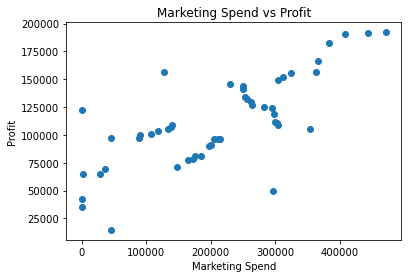

In [126]:
plt.scatter(df['Marketing Spend'], df['Profit'])
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


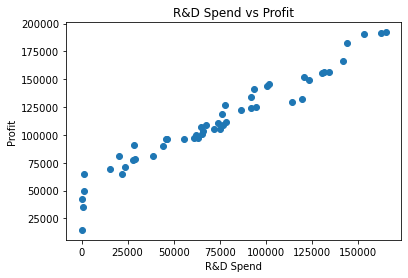

In [127]:
plt.scatter(df['R&D Spend'], df['Profit'])
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


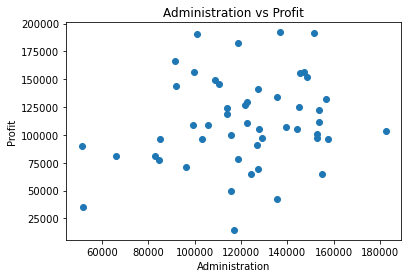

In [128]:
plt.scatter(df['Administration'], df['Profit'])
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()


Text(0.5, 0, 'State')

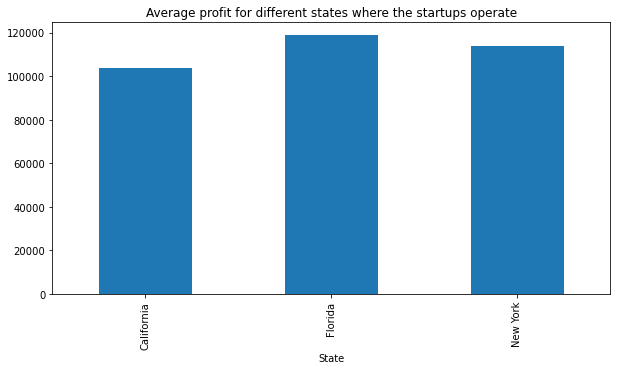

In [129]:
ax = df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5))
ax.set_title("Average profit for different states where the startups operate")

ax.set_xlabel("State")
ax.set_xlabel("State")

In [130]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [131]:
df['NewYork_State'] = np.where(df['State']=='New York',1,0)
df['California_State'] = np.where(df['State']=='California',1,0)
df['Florida_State'] = np.where(df['State']=='Florida',1,0)

df.drop(columns=['State'],axis=1,inplace=True)

In [132]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [133]:
dependent_variable = 'Profit'

In [134]:
independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [135]:
X = df[independent_variables].values
y = df[dependent_variable].values

In [136]:
print(X)
print(y)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.0067196e+05 9.179

# Splitting the dataset

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [138]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)
X_train[1:5]

array([[0.00327821, 0.00444355, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.98286294, 0.22709197, 1.        , 0.        ,
        0.        ],
       [0.69261666, 0.68906137, 0.55486446, 1.        , 0.        ,
        0.        ],
       [0.37493063, 0.62167963, 0.19316302, 0.        , 0.        ,
        1.        ]])

# Multiple Linear Regression Model

In [139]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = regressor.predict(X_test)

In [141]:
X_test.size


102

In [142]:
y_pred.size

17

In [143]:
X_train.size


198

In [144]:
y_train.size

33

In [145]:
y_test.size

17

In [146]:
X_test

array([[0.39946683, 1.26892014, 0.25042853, 0.        , 0.        ,
        1.        ],
       [0.60884455, 0.39128957, 0.52936195, 0.        , 1.        ,
        0.        ],
       [0.61635061, 0.57292553, 0.48573267, 0.        , 0.        ,
        1.        ],
       [0.16869099, 0.32290051, 0.34861436, 0.        , 0.        ,
        1.        ],
       [0.92798459, 0.48165538, 0.8646636 , 0.        , 0.        ,
        1.        ],
       [0.43609283, 0.73975262, 0.74861321, 1.        , 0.        ,
        0.        ],
       [0.12234465, 0.14165731, 0.39269043, 1.        , 0.        ,
        0.        ],
       [0.36974101, 0.97967389, 0.18698856, 1.        , 0.        ,
        0.        ],
       [0.4475048 , 0.69066401, 0.64291963, 0.        , 0.        ,
        1.        ],
       [0.85943772, 0.3874369 , 0.77613557, 0.        , 0.        ,
        1.        ],
       [0.33561668, 0.50012413, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0

In [147]:
y_pred

array([111616.64259451, 132709.39466316, 140155.11033793,  76099.20398184,
       186329.94240372, 112822.19807255,  63002.00394804,  99107.10428091,
       119287.75473383, 175522.83864739, 101000.698615  ,  85772.99293235,
       117713.76481525,  90230.88085201, 133375.04389452, 167530.54765828,
       158013.54602063])

In [148]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 , 155752.6 , 132602.65])

In [149]:
#regressor.predict([[165349.20],[136897.80],[471784.10],[1,0,0]])